# Previsão de aluguéis de bicicletas

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [3]:
bike = pd.read_csv('./datasets/bicicletas.csv')

In [4]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

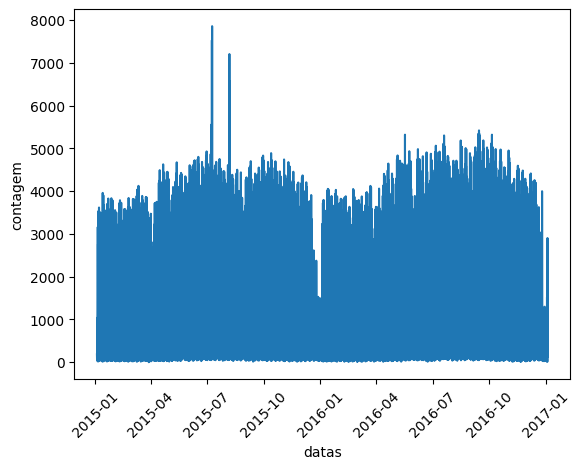

In [6]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=45)

In [7]:
sc2 = StandardScaler()

In [8]:
sc2.fit(bike['contagem'].values.reshape(-1, 1))

StandardScaler()

In [9]:
y = sc2.transform(bike['contagem'].values.reshape(-1, 1))

In [10]:
tamanho_treino = int(len(y) * 0.9)
tamanho_teste = len(y) - tamanho_treino

y_treino = y[0:tamanho_treino]
y_teste = y[tamanho_treino:len(y)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

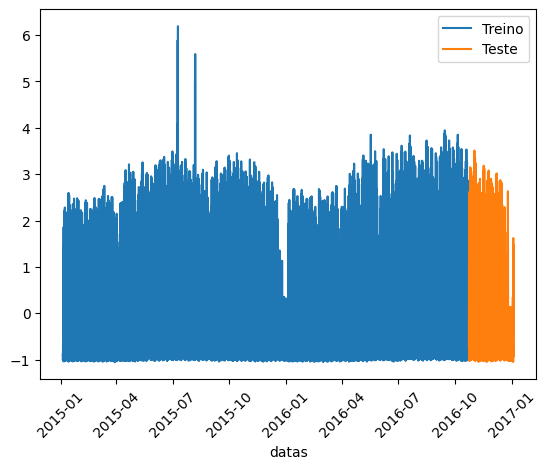

In [11]:
sns.lineplot(x='datas', y=y_treino[:, 0], data=bike[0:tamanho_treino], label='Treino')
sns.lineplot(x='datas', y=y_teste[:, 0], data=bike[tamanho_treino:len(y)], label='Teste')
plt.xticks(rotation=45)

In [12]:
def separa_dados(vetor, n_passos):
    X_novo = []
    y_novo = []
    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    return np.array(X_novo), np.array(y_novo)

In [13]:
vetor = pd.DataFrame(y_treino)[0]

In [14]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 10)

In [15]:
x_treino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [16]:
vetor2 = pd.DataFrame(y_teste)[0]

In [17]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 10)

## Redes Neurais Recorrentes

In [18]:
x_treino_novo = x_treino_novo.reshape(x_treino_novo.shape[0], x_treino_novo.shape[1], 1)

In [19]:
x_teste_novo = x_teste_novo.reshape(x_teste_novo.shape[0], x_teste_novo.shape[1], 1)

In [20]:
recorrente = Sequential()

recorrente.add(LSTM(128, input_shape = (x_treino_novo.shape[1], x_treino_novo.shape[2])))
recorrente.add(Dense(1))

recorrente.compile(optimizer = 'RMSProp', loss = 'mean_squared_error')
recorrente.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
resultados = recorrente.fit(x_treino_novo, y_treino_novo, validation_data=(x_teste_novo, y_teste_novo), epochs = 100)

Epoch 1/100

490/490 [==============================] - 10s 10ms/step - loss: 0.3008 - val_loss: 0.0917
Epoch 2/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0812 - val_loss: 0.0350
Epoch 3/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0565 - val_loss: 0.0363
Epoch 4/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0475 - val_loss: 0.0314
Epoch 5/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0430 - val_loss: 0.0291
Epoch 6/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0407 - val_loss: 0.0373
Epoch 7/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0393 - val_loss: 0.0275
Epoch 8/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0370 - val_loss: 0.0253
Epoch 9/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0355 - val_loss: 0.0249
Epoch 10/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0346 - 

In [22]:
y_ajustado = recorrente.predict(x_treino_novo)

490/490 [==============================] - 3s 4ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

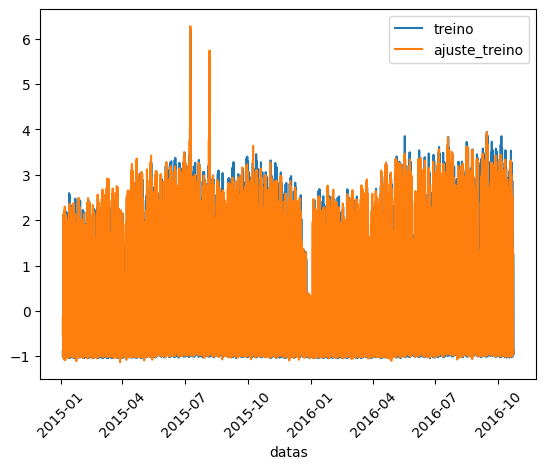

In [23]:
sns.lineplot(x='datas', y=y_treino[:, 0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:, 0], data=bike[0:15662], label='ajuste_treino')
plt.xticks(rotation=45)

In [24]:
y_predito = recorrente.predict(x_teste_novo)

55/55 [==============================] - 0s 4ms/step


<Axes: xlabel='datas'>

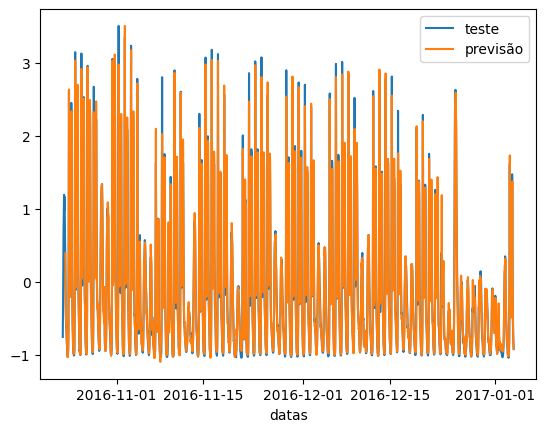

In [25]:
sns.lineplot(x='datas', y=y_teste[:, 0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito[:, 0], data=bike[tamanho_treino+10:len(bike)], label='previsão')

## GRU

In [26]:
from tensorflow.keras.layers import GRU

In [27]:
recorrente_g = Sequential()

recorrente_g.add(GRU(128, input_shape = (x_treino_novo.shape[1], x_treino_novo.shape[2])))
recorrente_g.add(Dense(1))

recorrente_g.compile(optimizer = 'RMSProp', loss = 'mean_squared_error')
recorrente_g.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
resultado2 = recorrente_g.fit(x_treino_novo, y_treino_novo, validation_data=(x_teste_novo, y_teste_novo), epochs = 100)

Epoch 1/100
490/490 [==============================] - 7s 9ms/step - loss: 0.2299 - val_loss: 0.0648
Epoch 2/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0730 - val_loss: 0.0411
Epoch 3/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0523 - val_loss: 0.0434
Epoch 4/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0447 - val_loss: 0.0318
Epoch 5/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0405 - val_loss: 0.0273
Epoch 6/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0382 - val_loss: 0.0220
Epoch 7/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0360 - val_loss: 0.0228
Epoch 8/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0344 - val_loss: 0.0240
Epoch 9/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0335 - val_loss: 0.0242
Epoch 10/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0322 - val_lo

In [29]:
y_predito2 = recorrente_g.predict(x_teste_novo)

55/55 [==============================] - 1s 4ms/step


<Axes: xlabel='datas'>

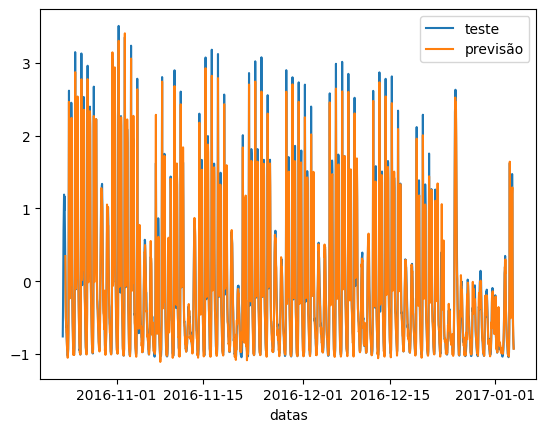

In [30]:
sns.lineplot(x='datas', y=y_teste[:, 0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito2[:, 0], data=bike[tamanho_treino+10:len(bike)], label='previsão')

In [31]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


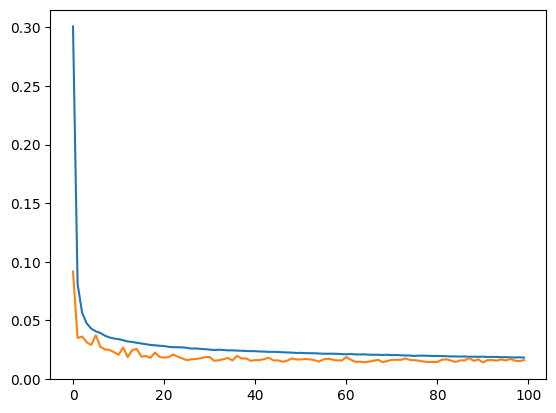

In [32]:
plt.plot(resultados.history['loss'])
plt.plot(resultados.history['val_loss'])

Text(0, 0.5, 'Custo')

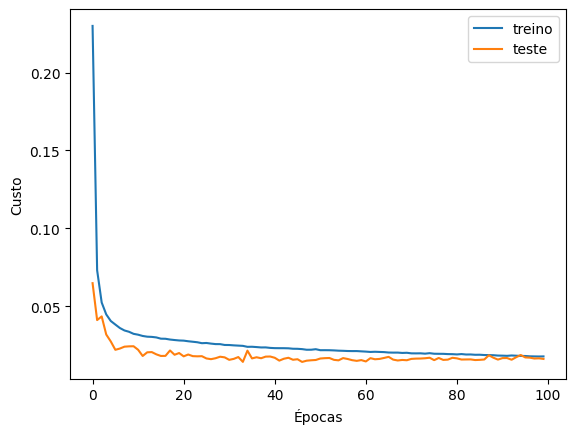

In [33]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')